Este notebook foi executado pelo Google Colaboratory. Para executá-lo, clone o repositório para um diretório em seu Google Drive, conecte o notebook com o drive `drive.mount('/content/drive')` e localize o repositório já clonado `%cd /content/drive/.../PAC/cnn`.

# Localizando repositório

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Github/PAC

/content/drive/MyDrive/Github/PAC


# Inicializando

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import binary_crossentropy
from tensorflow.keras.losses import BinaryCrossentropy
from src.metrics import *


from src.data import load_dataset
from src.segmentation import UNet
from src.visualize import set_custom_style, plot_training
set_custom_style()

In [4]:
%%time
dataset = load_dataset(grayscale=True, augmentation=True, norm=True)

CPU times: user 2.07 s, sys: 528 ms, total: 2.6 s
Wall time: 32.4 s


In [10]:
dataset[0][0].shape

TensorShape([196, 256, 256, 1])

In [22]:
from src.visualize import plot_image, plot_label

TensorShape([256, 256, 1])

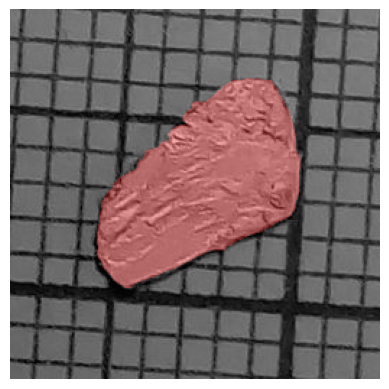

In [70]:
i = -31
plot_label(dataset[0][0][i], dataset[0][1][i])
dataset[0][1][i].shape

# Treinamento

In [ ]:
unet = UNet('unet-binary_crossentropy-16_32_64-ii', dataset).build((16, 32, 64))
unet.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss= BinaryCrossentropy(),
    metrics= [DSC, IoU, area_mape]
)

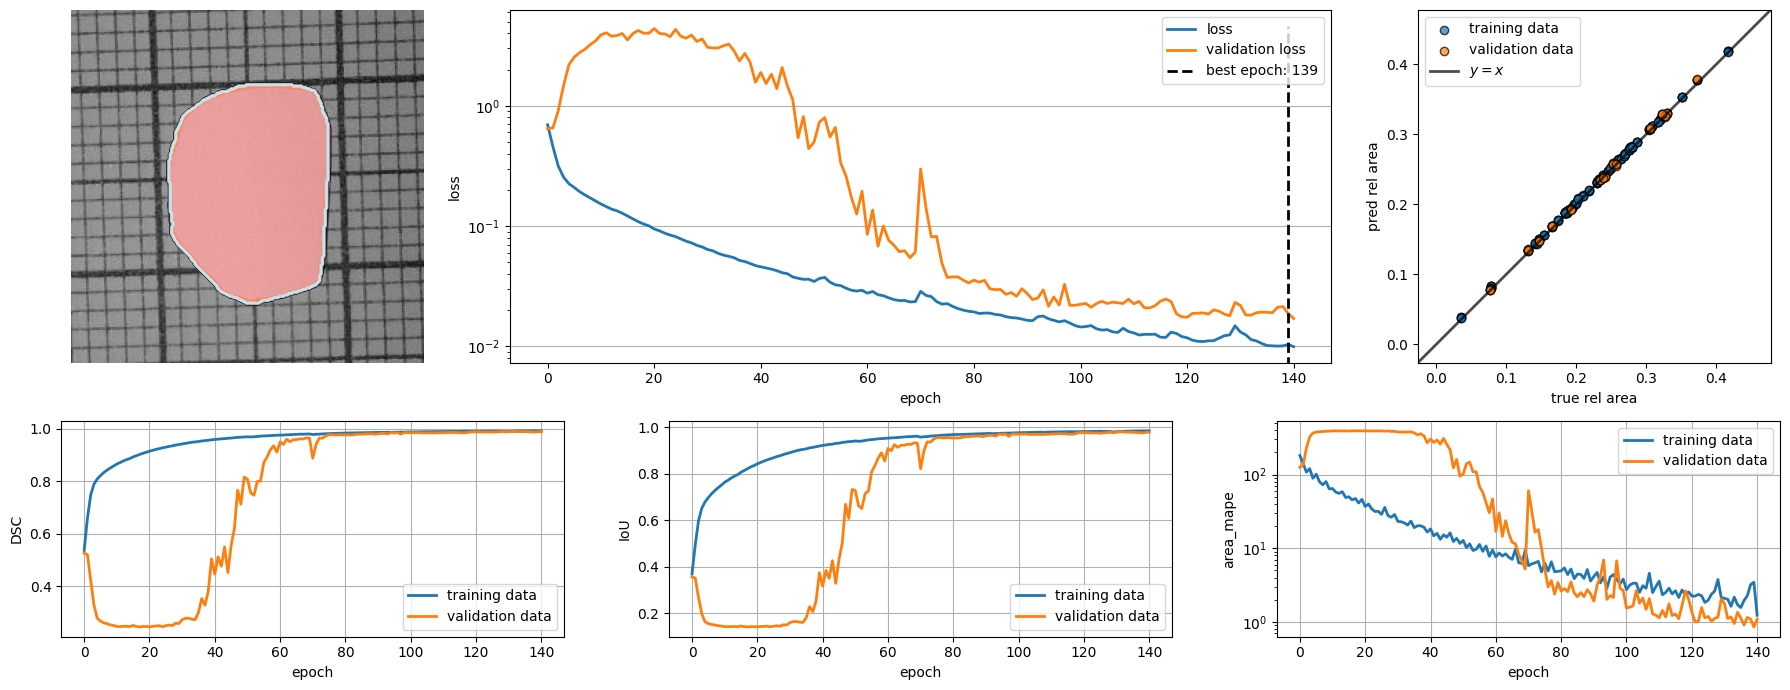

,epoch,DSC,IoU,area_mape,loss,val_DSC,val_IoU,val_area_mape,val_loss
139,139,0.992253,0.984628,3.461044,0.010393,0.989028,0.978301,0.856556,0.018693
136,136,0.992240,0.984600,1.960344,0.010104,0.988927,0.978107,0.909283,0.019049
133,133,0.991595,0.983332,2.174541,0.011110,0.989522,0.979268,0.951303,0.019043
121,121,0.991144,0.982445,2.245568,0.011274,0.988160,0.976602,1.004720,0.018782
122,122,0.991319,0.982789,2.366815,0.011032,0.987946,0.976184,1.014744,0.018871
126,126,0.991338,0.982829,2.376708,0.011709,0.987918,0.976131,1.027781,0.019613
140,140,0.992489,0.985091,1.235921,0.009947,0.989594,0.979408,1.084675,0.017054
138,138,0.992368,0.984852,3.211356,0.010111,0.987880,0.976059,1.095032,0.021452
116,116,0.990656,0.981487,2.148498,0.011876,0.984919,0.970297,1.108733,0.024769
131,131,0.990859,0.981887,2.036449,0.012488,0.990312,0.980825,1.114293,0.018263


7/7 [==============================] - 174s 26s/step - loss: 0.0099 - DSC: 0.9925 - IoU: 0.9851 - area_mape: 1.2359 - val_loss: 0.0171 - val_DSC: 0.9896 - val_IoU: 0.9794 - val_area_mape: 1.0847
Epoch 142/1000
7/7 [==============================] - 119s 17s/step - loss: 0.0100 - DSC: 0.9925 - IoU: 0.9851 - area_mape: 1.9102 - val_loss: 0.0170 - val_DSC: 0.9898 - val_IoU: 0.9797 - val_area_mape: 1.0204
Epoch 143/1000
1/7 [===>..........................] - ETA: 1:44 - loss: 0.0093 - DSC: 0.9928 - IoU: 0.9857 - area_mape: 1.2999

In [ ]:
history = unet.fit(1000, unet.x_train.shape[0]//6, plot=True, period=20, ranking=10)

# Contunuando treinamento

In [ ]:
unet = UNet('unet-binary_crossentropy-16_32_64-ii', dataset).load(compile=False)
unet.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss= BinaryCrossentropy(),
    metrics= [DSC, IoU, area_mape]
)

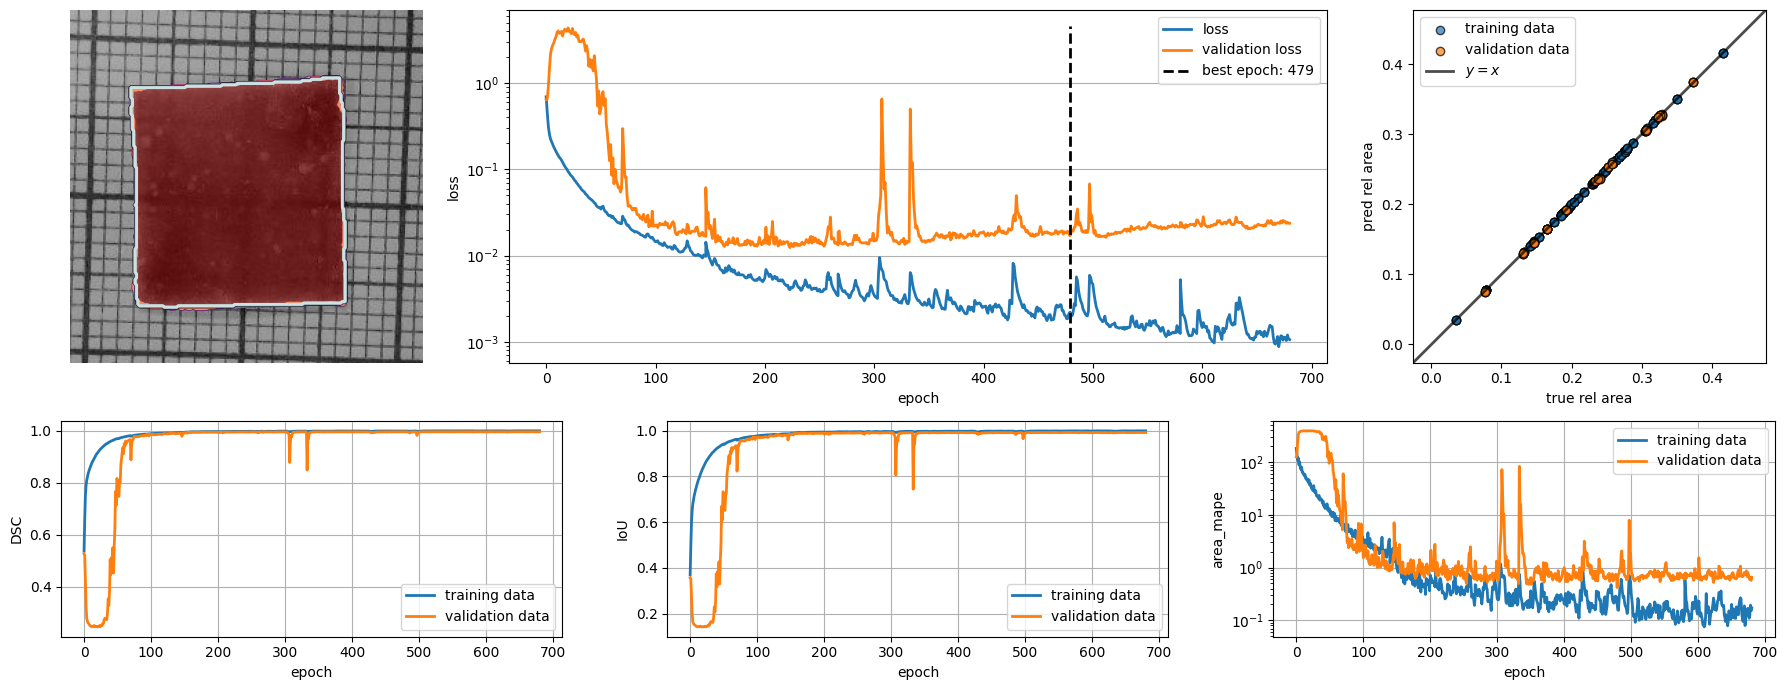

,epoch,DSC,IoU,area_mape,loss,val_DSC,val_IoU,val_area_mape,val_loss
481,479,0.998651,0.997305,0.202388,0.002210,0.995662,0.991368,0.418916,0.016965
353,351,0.998286,0.996579,0.239192,0.002723,0.995396,0.990841,0.482050,0.014599
349,347,0.998261,0.996528,0.228498,0.002767,0.995398,0.990844,0.482934,0.014200
350,348,0.998309,0.996623,0.174721,0.002650,0.995287,0.990626,0.483119,0.014860
346,344,0.998282,0.996570,0.225415,0.002677,0.995247,0.990546,0.490690,0.014566
334,332,0.998130,0.996267,0.537931,0.003048,0.995236,0.990525,0.498809,0.014551
255,254,0.997528,0.995069,0.441000,0.004082,0.995168,0.990387,0.500432,0.012895
626,623,0.999022,0.998045,0.264527,0.001779,0.995283,0.990618,0.522941,0.024194
287,285,0.997290,0.994596,0.390745,0.004288,0.994892,0.989841,0.529392,0.015277
372,370,0.997998,0.996005,0.343449,0.003254,0.995307,0.990664,0.530613,0.015222


7/7 [==============================] - 190s 28s/step - loss: 0.0011 - DSC: 0.9993 - IoU: 0.9986 - area_mape: 0.1728 - val_loss: 0.0237 - val_DSC: 0.9956 - val_IoU: 0.9913 - val_area_mape: 0.6565
Epoch 682/1580
7/7 [==============================] - 136s 19s/step - loss: 0.0010 - DSC: 0.9993 - IoU: 0.9987 - area_mape: 0.1070 - val_loss: 0.0248 - val_DSC: 0.9955 - val_IoU: 0.9911 - val_area_mape: 0.6617
Epoch 683/1580
7/7 [==============================] - 138s 20s/step - loss: 9.3702e-04 - DSC: 0.9994 - IoU: 0.9988 - area_mape: 0.0834 - val_loss: 0.0253 - val_DSC: 0.9955 - val_IoU: 0.9910 - val_area_mape: 0.7473
Epoch 684/1580
7/7 [==============================] - 153s 22s/step - loss: 9.0147e-04 - DSC: 0.9994 - IoU: 0.9988 - area_mape: 0.0817 - val_loss: 0.0245 - val_DSC: 0.9956 - val_IoU: 0.9912 - val_area_mape: 0.6923
Epoch 685/1580
7/7 [==============================] - 150s 22s/step - loss: 8.9526e-04 - DSC: 0.9994 - IoU: 0.9988 - area_mape: 0.0885 - val_loss: 0.0248 - val_DSC: 0.

In [ ]:
history = unet.fit(1000, unet.x_train.shape[0]//6, plot=True, period=20, ranking=10)

In [ ]:
from src.config import Paths

[]

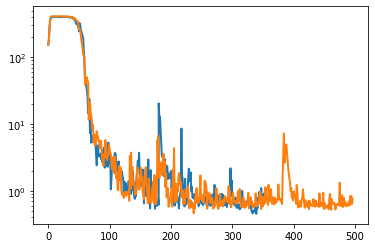

In [ ]:
for unet_path in Paths.models.glob('unet*'):
    unet = UNet(unet_path.name, dataset).load(compile=False) #.build((16, 32, 64))
    logs = unet.get_logs()
    plt.plot(logs.epoch, logs.val_area_mape)
plt.semilogy()